In [77]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input



In [78]:
results_df = pd.read_csv('data/ems_weather.csv').drop(columns=['Unnamed: 0'])
features = results_df.columns

In [79]:
# NOTE: features[N:M] actually is features[N] through features [M-1] -- it's non-inclusive

# features[0]       --- 'CAD_INCIDENT_ID'                                            ---- DROP (only an index)
# features[1]       --- 'INITIAL_SEVERITY_LEVEL_CODE'
# features[2]       --- 'FINAL_SEVERITY_LEVEL_CODE'
# features[3]       --- 'FIRST_ASSIGNMENT_DATETIME'                                  ---- DROP
# features[4]       --- 'VALID_DISPATCH_RSPNS_TIME_INDC' 
# features[5]       --- 'DISPATCH_RESPONSE_SECONDS_QY'                               ---- DROP
# features[6]       --- 'FIRST_ACTIVATION_DATETIME' 
# features[7]       --- 'VALID_INCIDENT_RSPNS_TIME_INDC'
# features[8]       --- 'INCIDENT_RESPONSE_SECONDS_QY'                               ------> y
# features[9]       --- 'INCIDENT_TRAVEL_TM_SECONDS_QY'
# features[10]      --- 'INCIDENT_CLOSE_DATETIME' 
# features[11]      --- 'HELD_INDICATOR' 
# features[12]      --- 'REOPEN_INDICATOR'
# features[13]      --- 'SPECIAL_EVENT_INDICATOR' 
# features[14]      --- 'STANDBY_INDICATOR'
# features[15]      --- 'TRANSFER_INDICATOR'
# features[16:96]   --- 'INITIAL_CALL_TYPE' dummies
# features[96:186]  --- 'FINAL_CALL_TYPE' dummies
# features[186:195] --- 'INCIDENT_DISPOSITION_CODE' dummies
# features[195:198] --- 'BOROUGH' dummies
# features[198:230] --- 'INCIDENT_DISPATCH_AREA' dummies
# features[230:594] --- 'ZIPCODE' dummies
# features[594:670] --- 'POLICEPRECINCT' dummies
# features[670:720] --- 'CITYCOUNCILDISTRICT' dummies
# features[720:788] --- 'COMMUNITYDISTRICT' dummies
# features[788:819] --- 'COMMUNITYSCHOOLDISTRICT' dummies
# features[829:831] --- 'CONGRESSIONALDISTRICT' dummies
# features[831]     --- 'CALL_YEAR'
# features[832]     --- 'CALL_DAY'
# features[833]     --- 'CALL_TIME'
# features[834]     --- 'CALL_UTC'
# features[835:846] --- 'CALL_MONTH' dummies
# features[846]     --- 'CALL_MONTH' (numeric)
# features[847]     --- 'AWIND'
# features[848]     --- 'PRCP'
# features[849]     --- 'SNOW'
# features[850]     --- 'SNWD'
# features[851]     --- 'TMAX'
# features[852]     --- 'TMIN'
# features[853]     --- 'TAVG_CALC'


In [109]:
# WITH TRAVEL TIME AND EVERYTHING ELSE:

y = results_df['INCIDENT_RESPONSE_SECONDS_QY']

# definitely drop these:
drop_features = ['INCIDENT_RESPONSE_SECONDS_QY', 
                 'CAD_INCIDENT_ID', 
                 'FIRST_ASSIGNMENT_DATETIME', 
                 'DISPATCH_RESPONSE_SECONDS_QY',
                 'AWND']
# suggest dropping these: 
drop_features += list(features[230:594]) # zip codes
drop_features += list(features[670:831]) # city council district, community district, community school dist, congressional district

X = results_df.drop(columns=drop_features)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr_withTT = LinearRegression()
lr_withTT.fit(X_train,y_train)
print('Train/Test Score:')
print(lr_withTT.score(X_train,y_train), lr_withTT.score(X_test,y_test))
pr_withTT = lr_withTT.predict(X_test)
R2 = r2_score(y_test,pr_withTT)
RMS = mean_squared_error(y_test,pr_withTT,squared=False)
print(f'R2: {R2}, RMS: {RMS}')

Train/Test Score:
0.810286698121503 0.9100079460612169
R2: 0.9100079460612169, RMS: 146.01742446289654


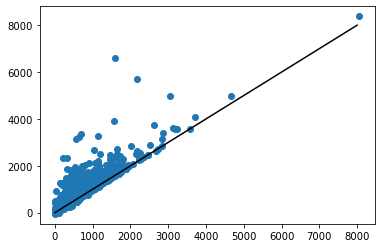

In [128]:
plt.plot([0, 8000],[0, 8000],color='black');
plt.scatter(y_test,pr_withTT);

In [110]:
# WITH TRAVEL TIME EXCLUDED:

y = results_df['INCIDENT_RESPONSE_SECONDS_QY']

# definitely drop these:
drop_features = ['INCIDENT_RESPONSE_SECONDS_QY', 
                 'CAD_INCIDENT_ID', 
                 'FIRST_ASSIGNMENT_DATETIME', 
                 'INCIDENT_TRAVEL_TM_SECONDS_QY',
                 'AWND']
# suggest dropping these: 
drop_features += list(features[230:594]) # zip codes
drop_features += list(features[670:831]) # city council district, community district, community school dist, congressional district

X = results_df.drop(columns=drop_features)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr_woTT = LinearRegression()
lr_woTT.fit(X_train,y_train)
print('Train/Test Score:')
print(lr_woTT.score(X_train,y_train), lr_withTT.score(X_test,y_test))
pr_woTT = lr_woTT.predict(X_test)
R2 = r2_score(y_test,pr_woTT)
RMS = mean_squared_error(y_test,pr_woTT,squared=False)
print(f'R2: {R2}, RMS: {RMS}')

Train/Test Score:
0.6663811678153357 -0.4628733333099173
R2: -79.65228684679158, RMS: 4371.3033408939955


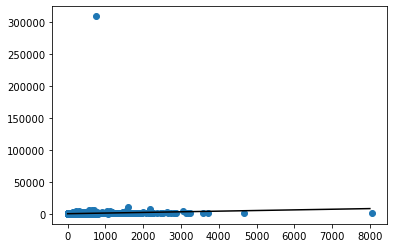

In [129]:
plt.plot([0, 8000],[0, 8000],color='black');
plt.scatter(y_test,pr_woTT);

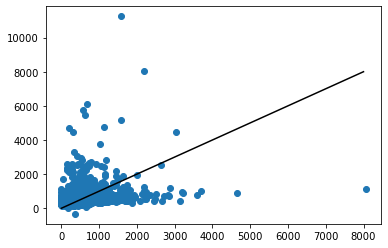

In [138]:
y1 = [y for n,y in enumerate(y_test) if pr_woTT[n]<=50_000]
p1 = [y for n,y in enumerate(pr_woTT) if pr_woTT[n]<=50_000]
plt.plot([0, 8000],[0, 8000],color='black');
plt.scatter(y1,p1);

In [111]:
# WITH ONLY TRAVEL TIME:

y = results_df['INCIDENT_RESPONSE_SECONDS_QY']

X = results_df[['INCIDENT_TRAVEL_TM_SECONDS_QY']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr_onlyTT = LinearRegression()
lr_onlyTT.fit(X_train,y_train)
print('Train/Test Score:')
print(lr_onlyTT.score(X_train,y_train), lr_onlyTT.score(X_test,y_test))
pr_onlyTT = lr_onlyTT.predict(X_test)
R2 = r2_score(y_test,pr_onlyTT)
RMS = mean_squared_error(y_test,pr_onlyTT,squared=False)
print(f'R2: {R2}, RMS: {RMS}')

Train/Test Score:
0.5169516215291659 0.6272394459972384
R2: 0.6272394459972384, RMS: 297.1786298639616


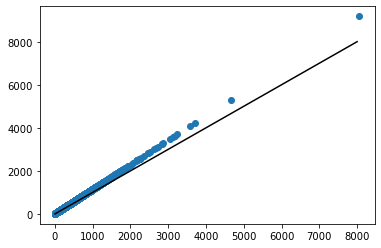

In [130]:
plt.plot([0, 8000],[0, 8000],color='black');
plt.scatter(y_test,pr_onlyTT);

In [114]:
# *PREDICT* TRAVEL TIME:

y = results_df['INCIDENT_TRAVEL_TM_SECONDS_QY']

# definitely drop these:
drop_features = ['INCIDENT_TRAVEL_TM_SECONDS_QY',
                 'INCIDENT_RESPONSE_SECONDS_QY', 
                 'CAD_INCIDENT_ID', 
                 'FIRST_ASSIGNMENT_DATETIME', 
                 'AWND']
# suggest dropping these: 
#drop_features += list(features[230:594]) # zip codes
#drop_features += list(features[670:831]) # city council district, community district, community school dist, congressional district

X = results_df.drop(columns=drop_features)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr_predTT = LinearRegression()
lr_predTT.fit(X_train,y_train)
print('Train/Test Score:')
print(lr_predTT.score(X_train,y_train), lr_predTT.score(X_test,y_test))
pr = lr_predTT.predict(X_test)
R2 = r2_score(y_test,pr)
RMS = mean_squared_error(y_test,pr,squared=False)
print(f'R2: {R2}, RMS: {RMS}')

Train/Test Score:
0.19961992108427262 -3.8780553725977986
R2: -3.8780553725977986, RMS: 747.5251269533569


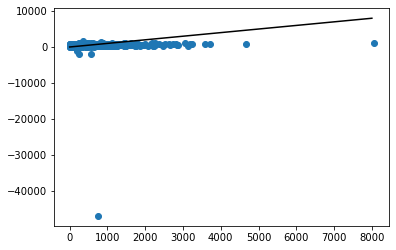

In [139]:
plt.plot([0, 8000],[0, 8000],color='black');
plt.scatter(y_test,pr);

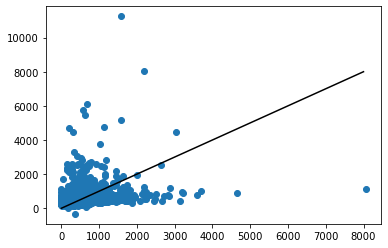

In [140]:
y1 = [y for n,y in enumerate(y_test) if pr[n]>=-10_000]
p1 = [y for n,y in enumerate(pr_woTT) if pr[n]>=-10_000]
plt.plot([0, 8000],[0, 8000],color='black');
plt.scatter(y1,p1);

In [104]:
lr_predTT.coef_

array([-2.14995872e+01,  2.00578386e+01, -1.11668177e+06, -3.24655934e-02,
        3.09239621e-02,  1.39432398e+06,  7.66308707e-04,  3.01553960e+02,
       -6.39918504e+01, -1.56167571e+03, -2.88709010e+04, -2.19309537e+02,
        2.39177645e+03,  2.15319131e+03,  2.42760595e+03, -4.38508568e+04,
        2.20272877e+03,  1.20607529e+03,  2.48174606e+03,  1.04465780e+03,
        2.25313954e+03,  1.15000667e+03,  2.16543895e+03,  2.35271458e+03,
        2.74671768e+03,  2.14605883e+03,  2.33366024e+03,  2.29128309e+03,
        1.36257082e+03,  2.03510958e+03,  2.93327625e+03,  2.34966581e+03,
        1.32130305e+03,  2.41395130e+03,  2.22760558e+03,  2.35024419e+03,
        2.53926263e+03,  2.23272640e+03,  2.48987014e+03,  1.12375728e+03,
        2.62305124e+03,  2.67715886e+03, -1.37276885e-03,  2.32873145e+03,
        2.40863509e+03,  2.24872875e+03,  2.88299428e+03,  2.41532118e+03,
        2.36367682e+03,  1.27395926e+03,  2.36142784e+03,  1.20589507e+03,
        2.38656623e+03,  

In [121]:
# *PREDICT* TRAVEL TIME:

y = np.array(results_df['INCIDENT_TRAVEL_TM_SECONDS_QY'])

# definitely drop these:
drop_features = ['INCIDENT_RESPONSE_SECONDS_QY', 
                 'CAD_INCIDENT_ID', 
                 'FIRST_ASSIGNMENT_DATETIME', 
                 'INCIDENT_TRAVEL_TM_SECONDS_QY']
# suggest dropping these: 
#drop_features += list(features[230:594]) # zip codes
#drop_features += list(features[670:831]) # city council district, community district, community school dist, congressional district
drop_features += ['AWND']

X = np.array(results_df.drop(columns=drop_features))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

# Scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

print(X_train.shape, y_train.shape)


(15019, 849) (15019,)


In [146]:

model = Sequential()
model.add(Input(shape=X_train_sc.shape[1]))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation=None))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

results = model.fit(X_train_sc, y_train, epochs=20, batch_size=256, validation_data=(X_test_sc, y_test))



Train on 15019 samples, validate on 5007 samples
Epoch 1/20
15019/15019 [==============================] - 5s 332us/sample - loss: 293377.7452 - mae: 437.3828 - val_loss: 288715.5073 - val_mae: 420.2567
Epoch 2/20
15019/15019 [==============================] - 3s 167us/sample - loss: 237549.9263 - mae: 374.1920 - val_loss: 209647.0801 - val_mae: 324.2136
Epoch 3/20
15019/15019 [==============================] - 3s 226us/sample - loss: 151524.2881 - mae: 258.6823 - val_loss: 128511.0245 - val_mae: 212.7223
Epoch 4/20
15019/15019 [==============================] - 3s 197us/sample - loss: 99458.4964 - mae: 191.9867 - val_loss: 103583.0649 - val_mae: 192.6052
Epoch 5/20
15019/15019 [==============================] - 3s 197us/sample - loss: 89490.5587 - mae: 188.4007 - val_loss: 101004.7782 - val_mae: 195.0099
Epoch 6/20
15019/15019 [==============================] - 3s 189us/sample - loss: 87629.0463 - mae: 188.3221 - val_loss: 100349.5340 - val_mae: 194.5461
Epoch 7/20
15019/15019 [======

In [147]:
preds0 = model.predict(X_train_sc)
R2 = r2_score(y_train,preds0)
RMS = mean_squared_error(y_train,preds0,squared=False)
print(f'R2: {R2}, RMS: {RMS}')


R2: 0.2437348140975616, RMS: 278.85133309929154


In [148]:

preds = model.predict(X_test_sc)
R2 = r2_score(y_test,preds)
RMS = mean_squared_error(y_test,preds,squared=False)
print(f'R2: {R2}, RMS: {RMS}')


R2: 0.14338899224546564, RMS: 313.2522924602567


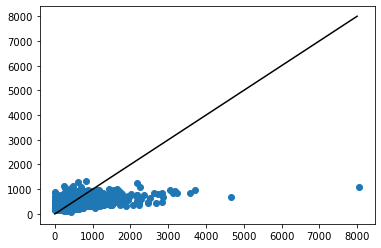

In [149]:
plt.plot([0, 8000],[0, 8000],color='black');
plt.scatter(y_test,preds);

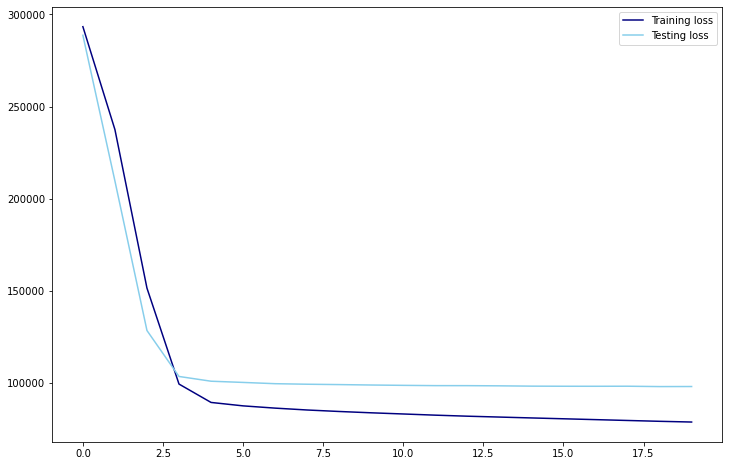

In [150]:
train_loss = results.history['loss']
test_loss = results.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

In [157]:

y = results_df['INCIDENT_TRAVEL_TM_SECONDS_QY']

# definitely drop these:
drop_features = ['INCIDENT_TRAVEL_TM_SECONDS_QY',
                 'INCIDENT_RESPONSE_SECONDS_QY', 
                 'CAD_INCIDENT_ID', 
                 'FIRST_ASSIGNMENT_DATETIME', 
                 'AWND']
# suggest dropping these: 
#drop_features += list(features[230:594]) # zip codes
#drop_features += list(features[670:831]) # city council district, community district, community school dist, congressional district

features = results_df.columns
features_keep = list(features[0:8]) 
features_keep += list(features[10:230]) 
features_keep += list(features[594:670])
features_keep += list(features[831:846]) 
features_keep.append(features[848])

X = results_df[features_keep]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr_predTT = LinearRegression()
lr_predTT.fit(X_train,y_train)
print('Train/Test Score:')
print(lr_predTT.score(X_train,y_train), lr_predTT.score(X_test,y_test))
pr = lr_predTT.predict(X_test)
R2 = r2_score(y_test,pr)
RMS = mean_squared_error(y_test,pr,squared=False)
print(f'R2: {R2}, RMS: {RMS}')

Train/Test Score:
0.1895653111320843 0.15018146768226048
R2: 0.15018146768226048, RMS: 312.0078575351584


In [156]:
features_keep

['CAD_INCIDENT_ID',
 'INITIAL_SEVERITY_LEVEL_CODE',
 'FINAL_SEVERITY_LEVEL_CODE',
 'FIRST_ASSIGNMENT_DATETIME',
 'VALID_DISPATCH_RSPNS_TIME_INDC',
 'DISPATCH_RESPONSE_SECONDS_QY',
 'FIRST_ACTIVATION_DATETIME',
 'VALID_INCIDENT_RSPNS_TIME_INDC',
 'INCIDENT_CLOSE_DATETIME',
 'HELD_INDICATOR',
 'REOPEN_INDICATOR',
 'SPECIAL_EVENT_INDICATOR',
 'STANDBY_INDICATOR',
 'TRANSFER_INDICATOR',
 'INITIAL_CALL_TYPE_ABDPN',
 'INITIAL_CALL_TYPE_ACC',
 'INITIAL_CALL_TYPE_ALTMEN',
 'INITIAL_CALL_TYPE_AMPMAJ',
 'INITIAL_CALL_TYPE_AMPMIN',
 'INITIAL_CALL_TYPE_ANAPFC',
 'INITIAL_CALL_TYPE_ANAPH',
 'INITIAL_CALL_TYPE_ARREFC',
 'INITIAL_CALL_TYPE_ARREST',
 'INITIAL_CALL_TYPE_ASTHFC',
 'INITIAL_CALL_TYPE_ASTHMA',
 'INITIAL_CALL_TYPE_ASTHMB',
 'INITIAL_CALL_TYPE_BURNMA',
 'INITIAL_CALL_TYPE_BURNMI',
 'INITIAL_CALL_TYPE_CARD',
 'INITIAL_CALL_TYPE_CARDBR',
 'INITIAL_CALL_TYPE_CARDFC',
 'INITIAL_CALL_TYPE_CDBRFC',
 'INITIAL_CALL_TYPE_CHILDA',
 'INITIAL_CALL_TYPE_CHOKE',
 'INITIAL_CALL_TYPE_COLD',
 'INITIAL_CALL_